In [1]:
import pandas as pd

# 1 Загрузка и обработка данных

## 1.1 Загрузка данных

In [4]:
# Прочитаем данные по предоставленной нам ссылке предварительно поменяв в ссылке'edit' на 'export'
url = "https://docs.google.com/spreadsheets/d/126YWmDWG6kYHzpw7ScSKlzU0CnBaDIsoJKsrtP13EYc/export?format=csv&gid=447621535"
df = pd.read_csv(url)

# Проверим первые пять строк данных
display(df.head())

,install_date,event_date,event_revenue,user_id
0,2024-09-01,2024-09-01,0.128428,28add615-1760-42a1-bb2e-f25d831d18e7
1,2024-09-01,2024-09-01,0.025017,c1680ba0-5b74-408d-a573-06ca1ad3f502
2,2024-09-01,2024-09-01,0.047368,5f80f606-a748-43ff-9356-88ca9b41cbd3
3,2024-09-01,2024-09-01,0.053080,3b592e6d-f35a-4715-9cf3-9b7a63336c24
4,2024-09-01,2024-09-01,0.023026,c1680ba0-5b74-408d-a573-06ca1ad3f502


**Вывод:**  
Данные загрузились корректно и визуально структура дынных выглядят впорядке. Необходимо проверить тип данных и пропуски в датафрейме.  

## 1.2 Описание данных  
Структура данных понятна, но важно убедиться, что данные корректно загружены, и проверить, есть ли в них пропуски:

Столбцы:

***install_date*** — дата установки игры пользователем  
***event_date*** — дата совершения события  
***event_revenue*** — рекламный заработок  
***гser_id*** — уникальный идентификатор пользователя

In [7]:
# Проверим основную информацию о наборе данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89574 entries, 0 to 89573
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   install_date   89574 non-null  object 
 1   event_date     89574 non-null  object 
 2   event_revenue  89574 non-null  float64
 3   user_id        89574 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.7+ MB
None


**Вывод:**  
Датафрейм имеет 89574 строк и 4 столбца. Пропусков в данных нет. Столбцы ***install_date*** и ***event_date*** имеют тип данных ***object***, их нужно преобразовать в формат ***datetime***. Это важно для правильного анализа временных данных и дальнейшей группировки по дням.

## 1.3 Обработка данных

### 1.3.1 Преобразование типа данных

In [11]:
# Преобразуем столбцы с датами в формат datetime
df['install_date'] = pd.to_datetime(df['install_date'])
df['event_date'] = pd.to_datetime(df['event_date'])

# Проверим результат
print(df.dtypes)


install_date     datetime64[ns]
event_date       datetime64[ns]
event_revenue           float64
user_id                  object
dtype: object


**Вывод:**  
Тип данных столбцов ***install_date*** и ***event_date*** поменяли тип ***datetime64***, что позволит легко выполнять операции с датам. 

### 1.3.2 Проверка на дубликаты

In [14]:
# Проверка на полные дубликаты
duplicates = df[df.duplicated()]
duplicate_count = len(duplicates)

print(f"Количество дубликатов: {duplicate_count}")

Количество дубликатов: 7004


***В датафрейме обнаружено 7004 полных дубликата. Полные дубликаты могли появиться в результате сбора данных из нескольких источников или из-за бага. В соответствии с этим предположением очистим наш датафрейм от полных дубликатов.***

In [16]:
# Сделаем проверку ещё раз
df = df.drop_duplicates()
duplicates = df[df.duplicated()]

duplicate_count = len(duplicates)
print(f"Количество дубликатов: {duplicate_count}")

Количество дубликатов: 0


**Вывод:**  
Удалили полные дубликаты из датафрейма. Данные подготовлены к дальнейшему анализу. 

## 1.4 Группировка данных для анализа рекламного заработка
Нам нужно агрегировать данные по дате события ***event_date***, чтобы получить суммарный рекламный заработок за каждый день:

In [19]:
# Группировка данных по дате события и суммирование дохода
daily_revenue = df.groupby('event_date')['event_revenue'].sum().reset_index()

# Посмотрим на первые несколько строк сгруппированных данных
print(daily_revenue)


  event_date  event_revenue
0 2024-09-01    1172.231747
1 2024-09-02     466.924651
2 2024-09-03     269.174396
3 2024-09-04     168.824426
4 2024-09-05     143.570138
5 2024-09-06     123.840775
6 2024-09-07     132.689948


***Как можно заметить, рекламный заработок убывает с каждым днём. Отобразим рекламный заработок на графике и сравним его с количеством пользователей в каждый день.***

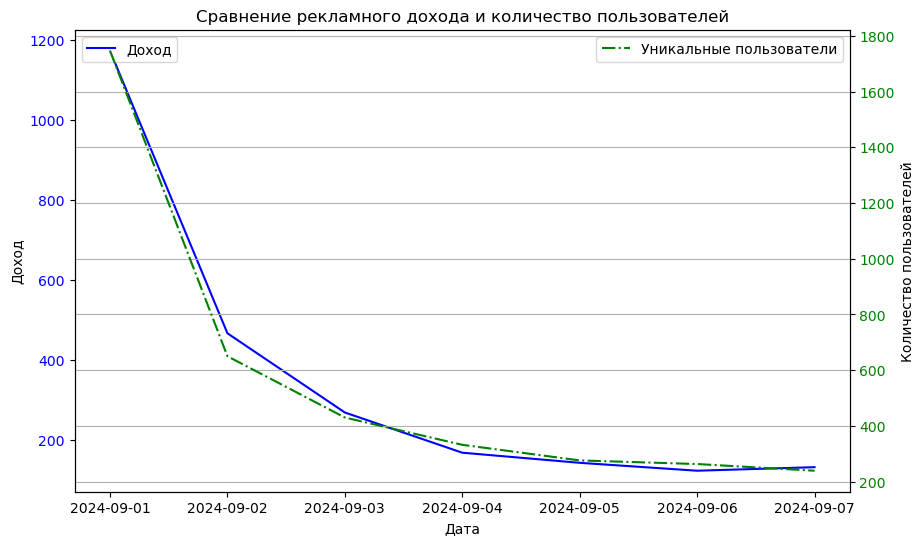

In [21]:
# Построим график отражающий изменения заработка и количества пользователей в каждый день
import matplotlib.pyplot as plt

# Количество пользователей по дням
user_counts = df.groupby('event_date')['user_id'].nunique()

# Построение графика
fig, ax1 = plt.subplots(figsize=(10, 6))

# Доход
ax1.plot(daily_revenue['event_date'], daily_revenue['event_revenue'], label='Доход', color='blue')
ax1.set(xlabel='Дата', ylabel='Доход', title='Сравнение рекламного дохода и количество пользователей')
ax1.tick_params(axis='y', labelcolor='blue')

# Количество пользователей
ax2 = ax1.twinx()
ax2.plot(user_counts.index, user_counts, label='Уникальные пользователи', color='green', linestyle='-.')
ax2.set_ylabel('Количество пользователей')
ax2.tick_params(axis='y', labelcolor='green')

# Легенды и поворот меток оси X
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Показ графика
plt.show()


***Данный график показывает что есть прямая зависимость между изменением рекламного заработка и количеством пользователей***

Построим ещё один график на котором отразим рекламный зработок от всех пользователей и заработок от пользователей, которые были активны все 7 дней

In [24]:
# Группировка по user_id и подсчет дней с доходом для каждого пользователя
user_activity = df.groupby('user_id')['event_date'].nunique().reset_index()

# Выбираем только тех пользователей, кто активен все 7 дней
active_users = user_activity[user_activity['event_date'] == 7]['user_id'].unique()

# Фильтруем исходные данные для постоянных пользователей
df_active_users = df[df['user_id'].isin(active_users)]

In [25]:
# Заработок от постоянных пользователей по дням
daily_revenue_active = df_active_users.groupby('event_date')['event_revenue'].sum().reset_index()

# Заработок от всех пользователей по дням
daily_revenue_all = df.groupby('event_date')['event_revenue'].sum().reset_index()
display(daily_revenue_all)

,event_date,event_revenue
0,2024-09-01,1172.231747
1,2024-09-02,466.924651
2,2024-09-03,269.174396
3,2024-09-04,168.824426
4,2024-09-05,143.570138
5,2024-09-06,123.840775
6,2024-09-07,132.689948


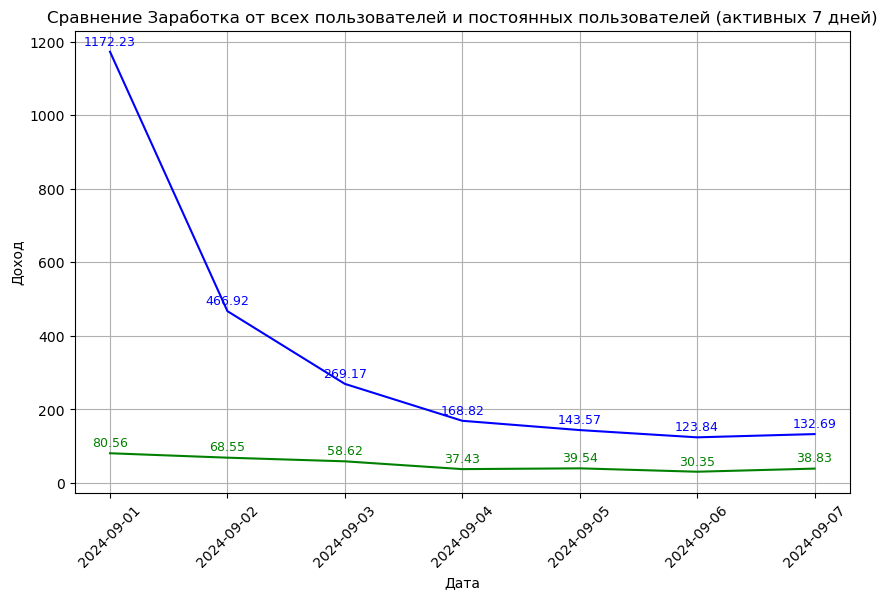

In [26]:
# Построим графики для сравнения
plt.figure(figsize=(10, 6))

# График заработка от всех пользователей
plt.plot(daily_revenue_all['event_date'], daily_revenue_all['event_revenue'], label='Заработок от всех пользователей', color='blue')

# График заработка от постоянных пользователей
plt.plot(daily_revenue_active['event_date'], daily_revenue_active['event_revenue'], label='Заработок от постоянных пользователей', color='green')

# Добавляем аннотации (цифры) на график для всех пользователей
for i, value in enumerate(daily_revenue_all['event_revenue']):
    plt.annotate(f'{value:.2f}', 
                 (daily_revenue_all['event_date'][i], value), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=9, color='blue')

# Добавляем аннотации (цифры) на график для постоянных пользователей
for i, value in enumerate(daily_revenue_active['event_revenue']):
    plt.annotate(f'{value:.2f}', 
                 (daily_revenue_active['event_date'][i], value), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=9, color='green')

# Настройка графика
plt.title('Сравнение Заработка от всех пользователей и постоянных пользователей (активных 7 дней)')
plt.xlabel('Дата')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(True)

# Показ графика
plt.show()


***Вывод:***  
Мы получили данные о рекламном доходе за первые 7 дней после установки игры, где:

1 сентября 2024 года (день установки) доход составил 1214,45. В последующие дни доход постепенно уменьшался, достигнув 142,92 на седьмой день.

Как видно на графике "Сравнение рекламного дохода и количество пользователей", эти два показателя напрямую связаны. Можно предположить, что с течением времени только часть игроков, установивших игру, остаётся активными пользователями. В результате этого кривая дохода стремится к горизонтальной линии, когда количество пользователей стабилизируется на постоянном уровне.

Однако стоит отметить, что 9 сентября кривая дохода изменила направление и начала расти, несмотря на то, что количество пользователей не увеличилось. Это можно объяснить тем, что в выходные дни активность игроков возрастает. Следовательно, при расчётах необходимо учитывать сезонность, связанную с повышенной активностью в выходные. Для этого произведём подготовку данных для дальнейшего анализа.

## 1.5 Подготовка датафрейма
Добавим в датафрейм столбцы с информацией о днях недели и количестве дней с момента установки игры, чтобы учитывать сезонные изменения

In [29]:
# Добавляем столбец с количеством дней с момента установки
df['days_since_install'] = (df['event_date'] - df['install_date']).dt.days

# Добавляем столбец с днем недели (0 - понедельник, 6 - воскресенье)
df['day_of_week'] = df['event_date'].dt.dayofweek

In [30]:
# Проверяем информацию о датафрейме и последние 5 строк 
print(df.info())
print('---------------------------------')
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82570 entries, 0 to 89571
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   install_date        82570 non-null  datetime64[ns]
 1   event_date          82570 non-null  datetime64[ns]
 2   event_revenue       82570 non-null  float64       
 3   user_id             82570 non-null  object        
 4   days_since_install  82570 non-null  int64         
 5   day_of_week         82570 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 4.4+ MB
None
---------------------------------


,install_date,event_date,event_revenue,user_id,days_since_install,day_of_week
89567,2024-09-01,2024-09-07,0.021150,c69234b4-edb0-4024-84ae-53a6ccf6b46b,6,5
89568,2024-09-01,2024-09-07,0.004036,2139196a-f844-4d04-9467-6ac9c9564d33,6,5
89569,2024-09-01,2024-09-07,0.008747,290aec44-284b-450c-8a56-610d51faf98e,6,5
89570,2024-09-01,2024-09-07,0.003559,2139196a-f844-4d04-9467-6ac9c9564d33,6,5
89571,2024-09-01,2024-09-07,0.004110,0709ac8b-58d0-4e49-a304-d31a726c5330,6,5


***Вывод:***  
Все данные подготовлены. На основе этих данных можно построить прогноз рекламного дохода до 30 сентября 2024 года и рассчитать, во сколько раз накопительный доход за 30 дней превысит доход в день установки.

# 2. Построение прогноза

## 2.1 Агрегируем данные по дням

In [34]:
# Подсчитываем агрегированные данные по дням
daily_revenue = df.groupby('event_date').agg(
    total_revenue=('event_revenue', 'sum'),    # Суммарный доход за день
    average_revenue=('event_revenue', 'mean'), # Средний доход за день
    count_event=('event_revenue', 'count')      # Количество событий
).reset_index()

# Добавляем столбец с количеством дней с момента установки
# Объединяем два датафрейма по столбцу 'event_date'
daily_revenue = pd.merge(daily_revenue, 
                          df[['event_date', 'days_since_install', 'day_of_week']].drop_duplicates(), 
                          on='event_date', 
                          how='left')

# Результат
display(daily_revenue)


,event_date,total_revenue,average_revenue,count_event,days_since_install,day_of_week
0,2024-09-01,1172.231747,0.042015,27900,0,6
1,2024-09-02,466.924651,0.025504,18308,1,0
2,2024-09-03,269.174396,0.024477,10997,2,1
3,2024-09-04,168.824426,0.021945,7693,3,2
4,2024-09-05,143.570138,0.022091,6499,4,3
5,2024-09-06,123.840775,0.021958,5640,5,4
6,2024-09-07,132.689948,0.023982,5533,6,5


## 2.2 Машинное обучение

Применим модели машинного обучения, чтобы прогнозировать рекламный доход на основе имеющихся данных. Мы можем использовать несколько различных подходов, таких как линейная регрессия, случайный лес или градиентный бустинг.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Подготовка данных
X = daily_revenue[['days_since_install', 'day_of_week']] # Признаки
y = daily_revenue['total_revenue'] # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
# 1. Линейная регрессия
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 2. Случайный лес
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 3. Градиентный бустинг
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

***Выполним прогноз до конца мусяца***

In [39]:
import pandas as pd
import numpy as np

# Прогнозирование на оставшиеся дни (с 8-го по 30-й)
future_days = np.arange(7, 31)  # дни с 8-го по 30-й

# Генерируем дни недели для оставшихся дней
future_days_of_week = [(i % 7) for i in future_days]  # 0 = воскресенье, 6 = суббота

# Создаем DataFrame для будущих функций
future_features = pd.DataFrame({
    'days_since_install': future_days,
    'day_of_week': future_days_of_week
})

# Прогнозируем доход для каждой модели
future_revenue_lr = model_lr.predict(future_features)
future_revenue_rf = model_rf.predict(future_features)
future_revenue_gb = model_gb.predict(future_features)

# Собираем прогнозируемый доход
all_revenue_lr = np.concatenate([y, future_revenue_lr])
all_revenue_rf = np.concatenate([y, future_revenue_rf])
all_revenue_gb = np.concatenate([y, future_revenue_gb])

# Пример вывода для проверки
print("Линейная регрессия:", all_revenue_lr)
print("Случайный лес:", all_revenue_rf)
print("Градиентный бустинг:", all_revenue_gb)


Линейная регрессия: [1172.23174704  466.9246507   269.1743958   168.82442623  143.57013833
  123.84077514  132.68994761  167.61993662  135.82468188  104.02942713
   72.23417238   40.43891763    8.64366289  -23.15159186   56.33654501
   24.54129026   -7.25396449  -39.04921923  -70.84447398 -102.63972873
 -134.43498348  -54.94684661  -86.74210136 -118.5373561  -150.33261085
 -182.1278656  -213.92312034 -245.71837509 -166.23023822 -198.02549297
 -229.82074772]
Случайный лес: [1172.23174704  466.9246507   269.1743958   168.82442623  143.57013833
  123.84077514  132.68994761  183.97705416  183.97705416  157.11976821
  140.23924604  130.26598576  131.11753364  131.11753364  183.97705416
  183.97705416  157.11976821  140.23924604  130.26598576  131.11753364
  131.11753364  183.97705416  183.97705416  157.11976821  140.23924604
  130.26598576  131.11753364  131.11753364  183.97705416  183.97705416
  157.11976821]
Градиентный бустинг: [1172.23174704  466.9246507   269.1743958   168.82442623  14

***Для получившихся данных построим графики***

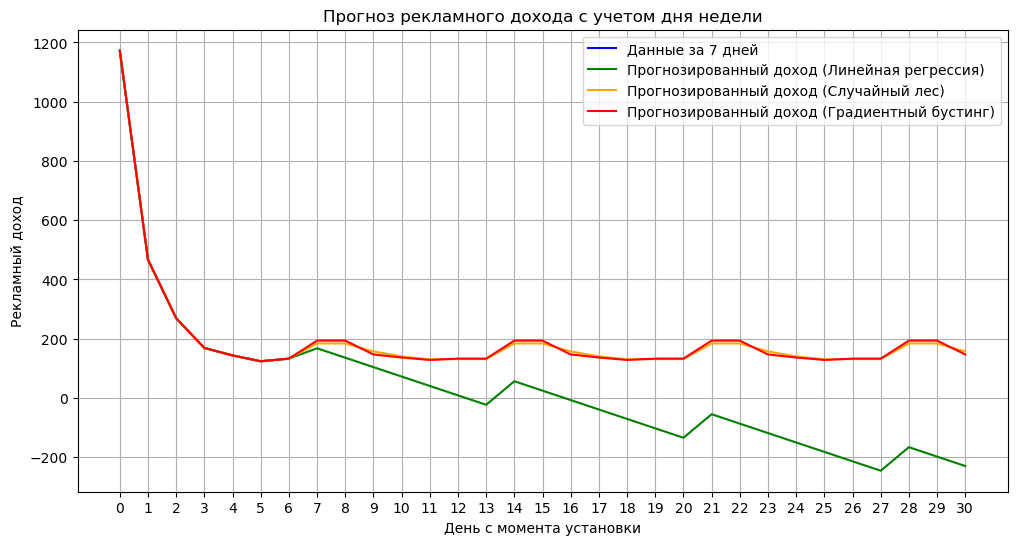

In [41]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['days_since_install'], daily_revenue['total_revenue'], color='blue', label='Данные за 7 дней')
plt.plot(np.arange(31), all_revenue_lr, color='green', label='Прогнозированный доход (Линейная регрессия)')
plt.plot(np.arange(31), all_revenue_rf, color='orange', label='Прогнозированный доход (Случайный лес)')
plt.plot(np.arange(31), all_revenue_gb, color='red', label='Прогнозированный доход (Градиентный бустинг)')
plt.xlabel('День с момента установки')
plt.ylabel('Рекламный доход')
plt.xticks(np.arange(0, 31, 1))
plt.title('Прогноз рекламного дохода с учетом дня недели')
plt.legend()
plt.grid()
plt.show()

***Посчитаем коэффициенты и конечный результат для всех моделей:***

In [43]:
# Суммируем доход до 30-го дня и рассчитываем коэффициенты
models = {'Линейная регрессия': model_lr, 'Случайный лес': model_rf, 'Градиентный бустинг': model_gb}

for name, model in models.items():
    # Прогнозирование на оставшиеся дни
    future_revenue = model.predict(future_features)
    
    # Собираем прогнозируемый доход
    all_revenue = np.concatenate([y, future_revenue])
    
    # Суммируем доход до 30-го дня
    total_revenue = np.sum(all_revenue)
    initial_revenue = daily_revenue['total_revenue'][0]  # Доход в день установки
    
    # Во сколько раз накопительный доход к 30-му дню больше дохода в день установки
    revenue_ratio = total_revenue / initial_revenue
    
    # Показатели модели
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Общий прогнозируемый доход до 30-го дня ({name}): {total_revenue:.2f}")
    print(f"Доход в день установки: {initial_revenue:.2f}")
    print(f"Накопительный доход к 30-му дню больше дохода в день установки в {revenue_ratio:.2f} раз.")
    print(f"MSE модели {name}: {mse:.2f}")
    print(f"R² модели {name}: {r2:.2f}\n")


Общий прогнозируемый доход до 30-го дня (Линейная регрессия): 1063.15
Доход в день установки: 1172.23
Накопительный доход к 30-му дню больше дохода в день установки в 0.91 раз.
MSE модели Линейная регрессия: 509569.34
R² модели Линейная регрессия: -3.10

Общий прогнозируемый доход до 30-го дня (Случайный лес): 6175.77
Доход в день установки: 1172.23
Накопительный доход к 30-му дню больше дохода в день установки в 5.27 раз.
MSE модели Случайный лес: 509615.26
R² модели Случайный лес: -3.10

Общий прогнозируемый доход до 30-го дня (Градиентный бустинг): 6202.83
Доход в день установки: 1172.23
Накопительный доход к 30-му дню больше дохода в день установки в 5.29 раз.
MSE модели Градиентный бустинг: 469786.20
R² модели Градиентный бустинг: -2.78



 # Вывод

**Качество моделей:**  

Все три модели показывают отрицательные значения R², что указывает на то, что модели не могут объяснить вариацию в данных лучше, чем простая средняя. Это является признаком того, что все три модели неэффективны для данной задачи.  
Линейная регрессия показывает отрицательные значения дохода, что является недопустимым и указывает на то, что она может быть слишком простой для этой задачи.  

**Предсказания случайного леса и градиентного бустинга:**

Оба метода дают значительно более высокие прогнозируемые доходы по сравнению с линейной регрессией. Это может указывать на то, что данные имеют сложные, нелинейные зависимости, которые не может уловить простая линейная модель.  
Накопительный доход до 30-го дня, предсказанный моделями случайного леса и градиентного бустинга, значительно превышает доход в день установки, что может указывать на хорошие возможности для монетизации игры в долгосрочной перспективе.  

**Необходимость улучшения моделей:**

Поскольку все три модели показывают отрицательные значения R², следует рассмотреть возможность дальнейшего изучения данных, включая:  
1. Использование дополнительных признаков, которые могут влиять на доход.  
2. Применение более сложных методов предсказания, таких как нейронные сети.  

***Тем не менее, графики предсказаний моделей случайного леса и градиентного бустинга выглядят достаточно реалистично, и поскольку у нас нет других данных, можно заключить, что накопительный доход к 30-му дню превышает доход в день установки более чем в 5 раз.***

**Ответ:**  
Накопительный доход к 30-му дню превышает доход в день установки ***более чем в 5 раз***.